# Notebook 1: Modelo de Carga
En este notebook vamos a implementar el algoritmo de clustering jerárquico en R con ayuda de la función hclust. Utilizaremos como ejemplo el modelo de carga web visto durante la sesión y cuyos datos se encuentran en el archivo cargaWeb.csv

In [1]:
datos <-read.table("cargaWeb.csv",dec=".",sep=";",header=TRUE)
print(datos)
summary(datos)

   Vnavega Vbusqueda VagregaCarro Vselecciona Vpaga
1        5        12            2           5     1
2       10        15            1          14     0
3        4         7            2           4     1
4       18        20            3          15     0
5        4        12            2           7     1
6        6        11            3           7     1
7        7        12            2           7     1
8        5         4            1           2     1
9        7        10            1           8     1
10      15        20            1          18     0


    Vnavega        Vbusqueda      VagregaCarro  Vselecciona       Vpaga     
 Min.   : 4.00   Min.   : 4.00   Min.   :1.0   Min.   : 2.0   Min.   :0.00  
 1st Qu.: 5.00   1st Qu.:10.25   1st Qu.:1.0   1st Qu.: 5.5   1st Qu.:0.25  
 Median : 6.50   Median :12.00   Median :2.0   Median : 7.0   Median :1.00  
 Mean   : 8.10   Mean   :12.30   Mean   :1.8   Mean   : 8.7   Mean   :0.70  
 3rd Qu.: 9.25   3rd Qu.:14.25   3rd Qu.:2.0   3rd Qu.:12.5   3rd Qu.:1.00  
 Max.   :18.00   Max.   :20.00   Max.   :3.0   Max.   :18.0   Max.   :1.00  

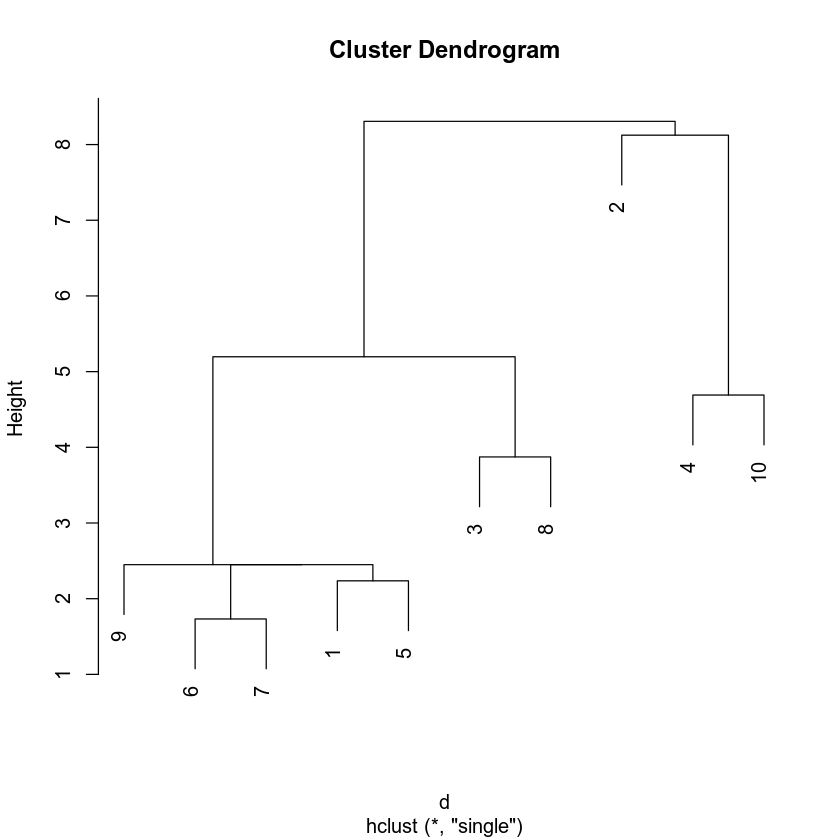

In [2]:
d <- dist(datos)
hd <- hclust(d, method = "single", members=NULL)
plot(hd, labels = NULL, hang = 0.1, axes = TRUE, frame.plot = FALSE, ann = TRUE, main = "Cluster Dendrogram",sub = NULL, xlab = NULL, ylab = "Height")

### Ejercicio 1: 
1. Defina el número de grupos mas adecuado para estos datos y caracterice los grupos obtenidos.
2. Considere las otras distancias entre grupos disponibles y descubra si hay diferencias en la jerarquía obtenida

### Respuesta:

#### Ejercicio 1.1

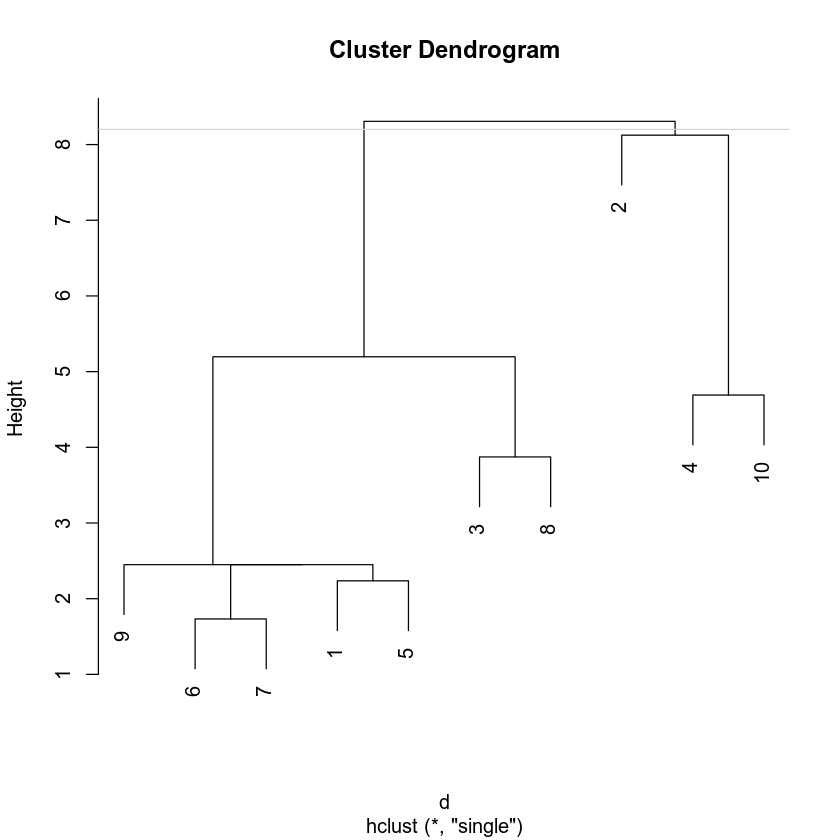

In [3]:
plot(hd, labels = NULL, hang = 0.1, axes = TRUE, frame.plot = FALSE, ann = TRUE, main = "Cluster Dendrogram",sub = NULL, xlab = NULL, ylab = "Height")
abline(h=8.2, col = "lightgrey")

In [4]:
cluster=cutree(hd, k=4)
cluster

[1] 1 2 3 4 1 1 1 3 1 4

Se establece k=4, para dividir en cuatro grupos.
* k=1: Representado por {1, 5, 6, 7, 8}
    * Estos usuarios pagaron
    * Navegaron poco
    * Seleccionaron poco
* k=2: Representado por {2}
    * Estos usuarios no pagaron
    * Seleccionaron harto
    * Navegaron harto
* k=3: Representado por {3, 8}
    * Estos usuarios pagaron
    * Seleccionaron poco
    * Navegaron poco
    * Buscaron poco
* k=4: Representado por {4, 10}
    * Estos usuarios no pagaron
    * Buscaron harto
    * Seleccionaron harto

#### Ejercicio 1.2

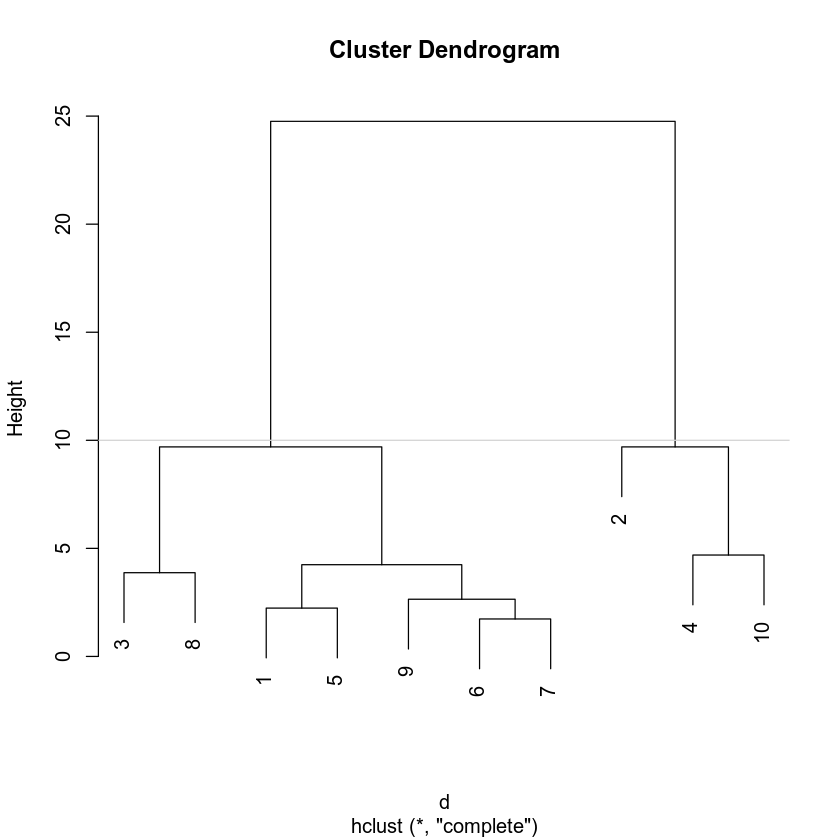

In [5]:
hc <- hclust(d, method = "complete", members=NULL)
plot(hc, labels = NULL, hang = 0.1, axes = TRUE, frame.plot = FALSE, ann = TRUE, main = "Cluster Dendrogram",sub = NULL, xlab = NULL, ylab = "Height")
abline(h=10, col = "lightgrey")

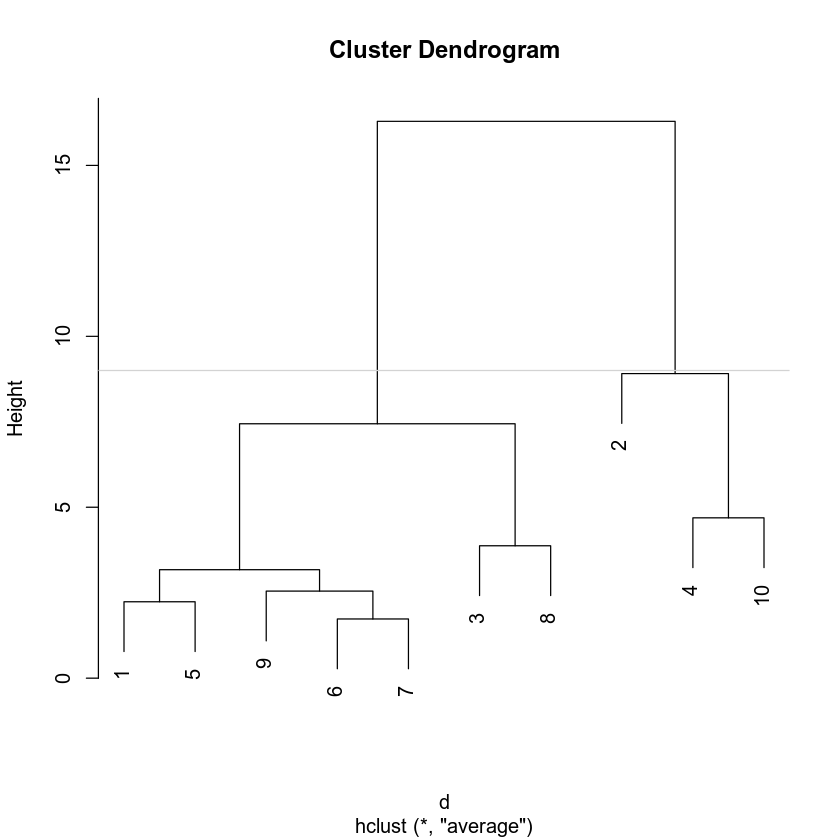

In [6]:
ha <- hclust(d, method = "average", members=NULL)
plot(ha, labels = NULL, hang = 0.1, axes = TRUE, frame.plot = FALSE, ann = TRUE, main = "Cluster Dendrogram",sub = NULL, xlab = NULL, ylab = "Height")
abline(h=9, col = "lightgrey")

* complete
    * Se puede ver que los dos grupos principales están a la misma altura.
    
* average
    * Los dos grupos principales están más cercanos que en single

Call:
princomp(x = datos, cor = TRUE)

Standard deviations:
   Comp.1    Comp.2    Comp.3    Comp.4    Comp.5 
1.9145280 1.0313641 0.4032833 0.2899160 0.1555054 

 5  variables and  10 observations.


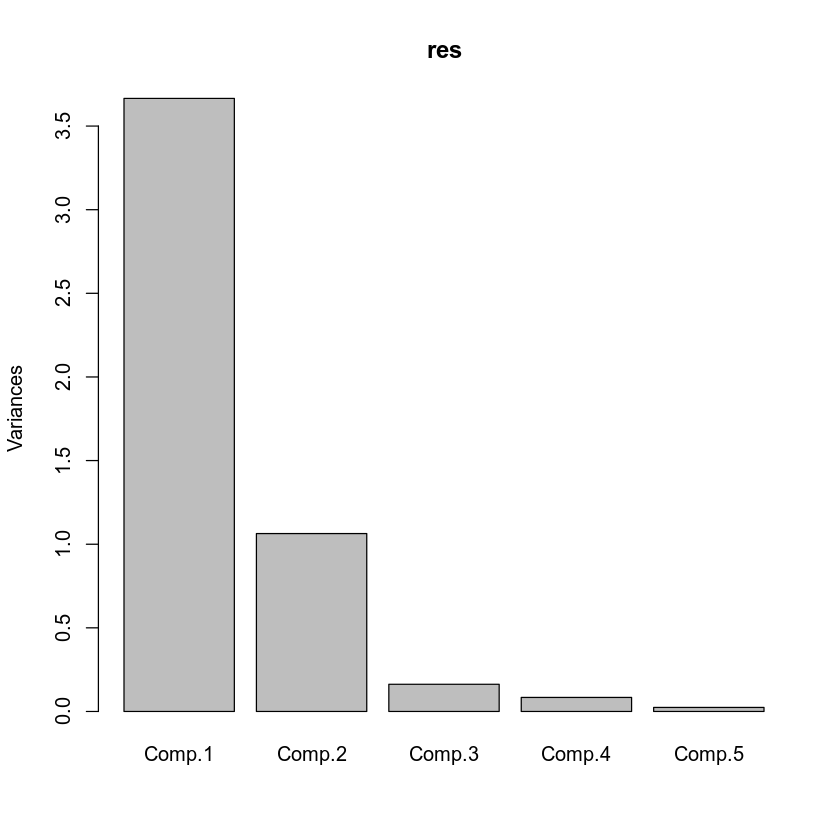

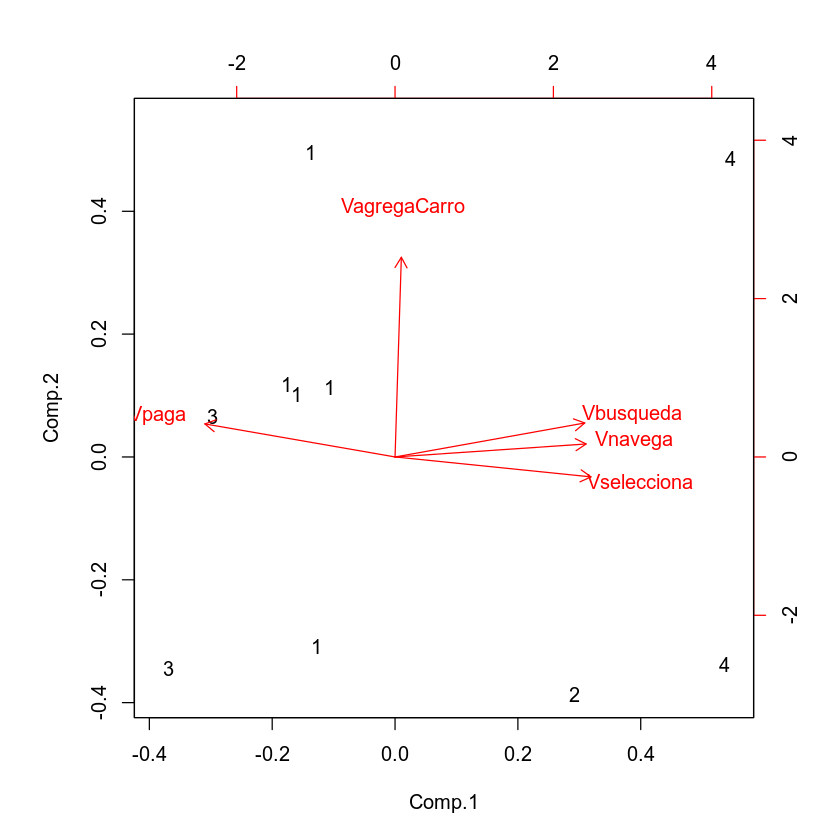

In [10]:
#Análisis de Componentes Principales para graficar los grupos obtenidos
#Calcula plano de componentes principales y grafica las observaciones con el número de su grupo
res <- princomp(datos, cor=TRUE)
print(res)
plot(res)
biplot(res,xlabs=cutree(hd,4))


Warning message:
“package ‘rattle’ was built under R version 3.6.3”Loading required package: tibble
Warning message:
“package ‘tibble’ was built under R version 3.6.3”Loading required package: bitops
Warning message:
“package ‘bitops’ was built under R version 3.6.3”Rattle: A free graphical interface for data science with R.
Versión 5.4.0 Copyright (c) 2006-2020 Togaware Pty Ltd.
Escriba 'rattle()' para agitar, sacudir y  rotar sus datos.


         Comp.1     Comp.2      Comp.3      Comp.4        Comp.5
[1,] -0.8601859  0.3375844 -0.27535356  0.08121848 -0.0049392045
[2,]  1.7734594 -1.2622384  0.04215081 -0.61351113 -0.0008547705
[3,] -2.0142126 -0.4542262  0.53121199 -0.06847580 -0.0014908552
[4,]  3.2779478  0.2413844  0.13609652  0.17218517  0.0142662517


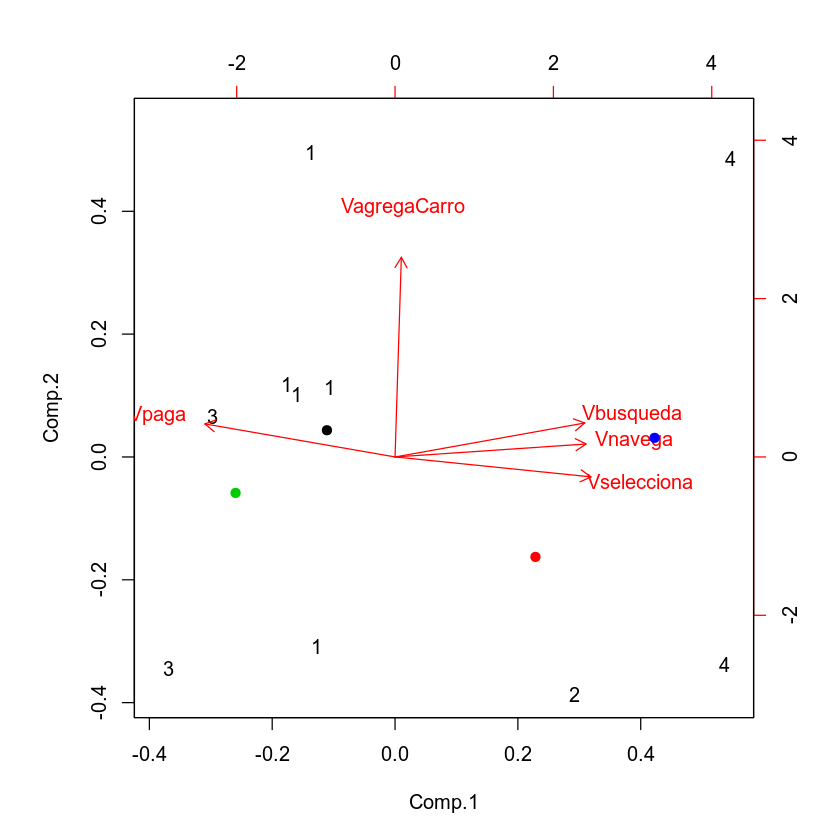

In [8]:
library(rattle)
#grafica los centros de cada grupo en el plano de componentes principales utilizando colores distintos
biplot(res,xlabs=cutree(hd,4))
centros <- centers.hclust(datos,hd,4)
res2 <- predict(res,centros)
print(res2)
points(res2[,1:2],col=1:4,pch=19)

### Ejercicio 2:
1. Interprete el agrupamiento obtenido visualizado en el primer plano principal
2. ¿Es representativo de los datos este primer plano principal? Justifique

### Respuesta

#### Ejercicio 2.1

#### Ejercicio 2.2

In [9]:
library(factoextra)
library(ggpubr)


fviz_dend(x = hd, k = 4, cex = 0.6) +
  geom_hline(yintercept = 5, linetype = "dashed") +
  labs(title = "Agrupamiento Jeráquico",
       subtitle = "Distancia euclídea, Lincage single, K=4")

fviz_cluster(object = list(data=datos, cluster=cutree(hd, k=4)),
             ellipse.type = "convex", repel = TRUE, show.clust.cent = TRUE,
             labelsize = 8)  +
  labs(title = "Agrupamiento Jeráquico + Proyección PCA",
       subtitle = "Distancia euclídea, Lincage single, K=4") +
  theme_bw() +
  theme(legend.position = "bottom")



print(res)
print(hd)

#biplot(res, xlabs= cutree(res,4))

Warning message:
“package ‘factoextra’ was built under R version 3.6.3”Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa
Warning message:
“package ‘ggpubr’ was built under R version 3.6.3”

ERROR: Error: package or namespace load failed for ‘ggpubr’ in loadNamespace(j <- i[[1L]], c(lib.loc, .libPaths()), versionCheck = vI[[j]]):
 namespace ‘broom’ 0.5.2 is being loaded, but >= 0.7.4 is required
